In [20]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import descartes

Retrieve .shp data of Canada's provinces/territories from 
https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2011-eng.cfm

Reference for building a map: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [22]:

import geopandas as gpd
map_path = r'data\canada_mapdata\lpr_000b16a_e.shp'
map_df = gpd.read_file(map_path)
map_df.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"(POLYGON ((8307365.58857 2582136.71143, 830839..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"(POLYGON ((8435711.754285 1679935.965715, 8435..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"(POLYGON ((8470851.645715 1624745.01143, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"(POLYGON ((8176224.537145 1722553.46, 8176230...."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"(POLYGON ((8399709.494284999 2261445.702855, 8..."


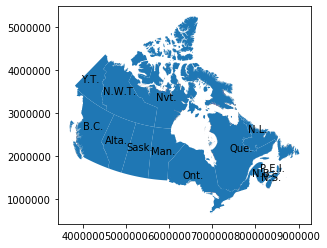

In [23]:
#create map labels 
map_df['labels'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['labels'] = [labels[0] for labels in map_df['labels']]

map_df.plot()
for idx, row in map_df.iterrows():
    plt.annotate(s=row['PREABBR'], xy=row['labels'],
                 horizontalalignment='center')

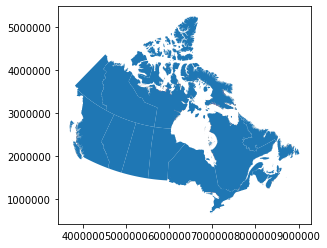

In [24]:
map_df.plot()

In [50]:
#import the historical data
import pandas as pd
data_df = pd.read_csv('jiying_thomas.csv')
data_df.head()
for province_code in data_df['Province Code'].unique(): 
    print(province_code)
data_df.head()

N.L.
P.E.I.
N.S.
N.B. 
Que.
Ont.
Man. 
Sask.
Alta.  
B.C. 
Y.T.
N.W.T.
Nvt.


,Unnamed: 0,Year,Province Code,GDP ($mm),Pop (k),CPI (healthcare),Private health spend/capita ($),Public health spend/capita ($)
0,0,1975,N.L.,NaN,556.5,31.472791,106.654722,368.634634
1,1,1976,N.L.,NaN,562.6,35.721618,154.403100,401.588494
2,2,1977,N.L.,NaN,565.3,38.160759,215.417603,426.511145
3,3,1978,N.L.,NaN,567.7,40.285173,257.675493,469.283953
4,4,1979,N.L.,NaN,570.1,42.162260,288.400246,541.834320


In [116]:
import re 
my_year = 2014
for year in data_df['Year'].unique():
    if year == my_year:
        df_test = data_df.loc[data_df['Year'] == year]
        df_test = df_test.reset_index()
        df_test.drop(['index','Unnamed: 0'], axis = 1, inplace = True )
        df_test['ratio'] = df_test['Private health spend/capita ($)']/df_test['Public health spend/capita ($)']
        #df_test['PREABBR'] = re.sub('[!@#$]', '', df_test['Province Code'])
#df_test.set_index('Province Code')
df_test['Province Code'] = df_test['Province Code'].str.strip()
df_test['Province Code'] = df_test['Province Code'].astype(str)


In [117]:
map_df['PREABBR'] = map_df['PREABBR'].astype(str)

In [118]:
#merge the two dataframes
merged = map_df.set_index('PREABBR').join(df_test.set_index('Province Code'))
merged

,PRUID,PRNAME,PRENAME,PRFNAME,PRFABBR,geometry,labels,Year,GDP ($mm),Pop (k),CPI (healthcare),Private health spend/capita ($),Public health spend/capita ($),ratio
PREABBR,,,,,,,,,,,,,,
N.L.,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,T.-N.-L.,"(POLYGON ((8307365.58857 2582136.71143, 830839...","(8058302.280821666, 2543821.4057125)",2014,34277.0,528.4,120.756249,1623.859243,5292.664851,0.306813
P.E.I.,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,Î.-P.-É.,"(POLYGON ((8435711.754285 1679935.965715, 8435...","(8393622.150738476, 1639505.1257125)",2014,5849.0,145.9,125.420049,1643.253835,4511.868006,0.364207
N.S.,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.-É.,"(POLYGON ((8470851.645715 1624745.01143, 84710...","(8352438.155918451, 1436604.6357149999)",2014,39739.0,942.2,125.989894,1937.516440,4738.189529,0.408915
N.B.,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.-B.,"(POLYGON ((8176224.537145 1722553.46, 8176230....","(8154756.382154569, 1545437.86857)",2014,32388.0,754.7,117.426321,1885.998945,4347.515905,0.433811
Que.,24,Quebec / Québec,Quebec,Québec,Qc,"(POLYGON ((8399709.494284999 2261445.702855, 8...","(7662900.652879961, 2106214.4414275)",2014,375513.0,8210.5,132.347285,1681.189508,3945.679648,0.426084
Ont.,35,Ontario,Ontario,Ontario,Ont.,"(POLYGON ((6378815.614285 2295412.44, 6378746....","(6562884.375504933, 1491674.3242875)",2014,726053.0,13680.4,138.147626,1920.524628,4046.595655,0.474603
Man.,46,Manitoba,Manitoba,Manitoba,Man.,"(POLYGON ((6039656.508570001 2636304.342855, 6...","(5867655.264833283, 2054481.07857)",2014,64238.0,1280.9,130.128144,1632.479164,5050.830968,0.323210
Sask.,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,"POLYGON ((5248633.914285 2767057.262855, 52492...","(5305875.969116837, 2126363.1514275)",2014,82856.0,1120.6,127.080677,1464.945396,5045.480734,0.290348
Alta.,48,Alberta,Alberta,Alberta,Alb.,"POLYGON ((5228304.177145001 2767597.89143, 522...","(4769959.20234591, 2291195.914285)",2014,376597.0,4108.4,152.859122,1815.502589,4987.855165,0.363985


In [119]:
merged

,PRUID,PRNAME,PRENAME,PRFNAME,PRFABBR,geometry,labels,Year,GDP ($mm),Pop (k),CPI (healthcare),Private health spend/capita ($),Public health spend/capita ($),ratio
PREABBR,,,,,,,,,,,,,,
N.L.,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,T.-N.-L.,"(POLYGON ((8307365.58857 2582136.71143, 830839...","(8058302.280821666, 2543821.4057125)",2014,34277.0,528.4,120.756249,1623.859243,5292.664851,0.306813
P.E.I.,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,Î.-P.-É.,"(POLYGON ((8435711.754285 1679935.965715, 8435...","(8393622.150738476, 1639505.1257125)",2014,5849.0,145.9,125.420049,1643.253835,4511.868006,0.364207
N.S.,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.-É.,"(POLYGON ((8470851.645715 1624745.01143, 84710...","(8352438.155918451, 1436604.6357149999)",2014,39739.0,942.2,125.989894,1937.516440,4738.189529,0.408915
N.B.,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.-B.,"(POLYGON ((8176224.537145 1722553.46, 8176230....","(8154756.382154569, 1545437.86857)",2014,32388.0,754.7,117.426321,1885.998945,4347.515905,0.433811
Que.,24,Quebec / Québec,Quebec,Québec,Qc,"(POLYGON ((8399709.494284999 2261445.702855, 8...","(7662900.652879961, 2106214.4414275)",2014,375513.0,8210.5,132.347285,1681.189508,3945.679648,0.426084
Ont.,35,Ontario,Ontario,Ontario,Ont.,"(POLYGON ((6378815.614285 2295412.44, 6378746....","(6562884.375504933, 1491674.3242875)",2014,726053.0,13680.4,138.147626,1920.524628,4046.595655,0.474603
Man.,46,Manitoba,Manitoba,Manitoba,Man.,"(POLYGON ((6039656.508570001 2636304.342855, 6...","(5867655.264833283, 2054481.07857)",2014,64238.0,1280.9,130.128144,1632.479164,5050.830968,0.323210
Sask.,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,"POLYGON ((5248633.914285 2767057.262855, 52492...","(5305875.969116837, 2126363.1514275)",2014,82856.0,1120.6,127.080677,1464.945396,5045.480734,0.290348
Alta.,48,Alberta,Alberta,Alberta,Alb.,"POLYGON ((5228304.177145001 2767597.89143, 522...","(4769959.20234591, 2291195.914285)",2014,376597.0,4108.4,152.859122,1815.502589,4987.855165,0.363985


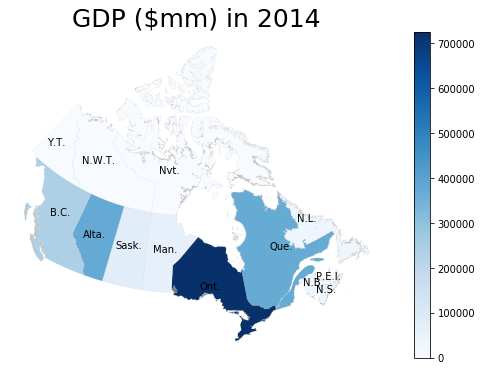

In [121]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'GDP ($mm)'
# set the range for the choropleth
vmin, vmax = 0, merged['GDP ($mm)'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')


# add a title
ax.set_title('GDP ($mm) in '+str(my_year), fontdict={"fontsize": '25', 'fontweight' : '3'})
# create an annotation for the data source
#ax.annotate('Statistics Canada, 2016',xy=(0.1, .08),
#            xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#creates the labels for the map
for idx, row in merged.iterrows():
    ax.annotate(s=idx, xy=row['labels'],
                 horizontalalignment='center')
    

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm = plt.cm.ScalarMappable(cmap='Blues')
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged.plot(column=variable, cmap='Blues', linewidth=0.1, ax=ax, edgecolor='0.75')

(3423124.13043, 9282051.51243, 430196.84214275004, 5471321.2350022495)